#1. 데이터의 이해
> 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터로써 수집된 피처 세트를 기반으로 어떠한 동작인지 예측해 보자
* https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

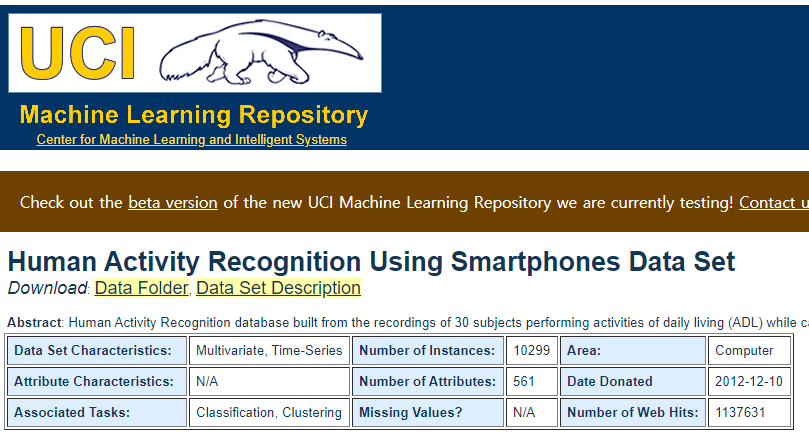

>위와 같이 나타나면 중간에 있는 Data Folder를 클릭한다.

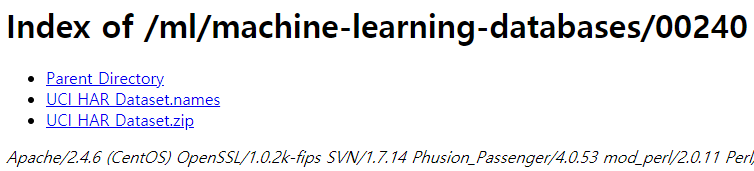

> 위와 같이 이동하면 UCI HAR Dataset.zip를 클릭하여 다운로드 받는다.

#2. 파일 읽기

##2.1 드라이버 로드

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2.2 정보 확인

In [50]:
import pandas as pd

filepath = '/content/drive/MyDrive/5. 머신러닝/3. 결정 트리/data/features.txt'
# sep='\s+' => 한 개 이상의 공백으로 구분되어 있는 경우 사용
# 현재 header가 존재하지 않음으로 None으로 설정
# names는 header의 이름을 지정할 경우 사용
df = pd.read_csv(filepath, sep='\s+', header=None, names=['index', 'name'])
df.head()

,index,name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


##2.3 중복된 feature명으로 에러

In [51]:
# 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
# 컬럼명은 feature_name 적용
dirpath = '/content/drive/MyDrive/5. 머신러닝/3. 결정 트리/data/'
X_train = pd.read_csv(dirpath+'train/X_train.txt', sep='\s+', names=df.name)
# X_test = pd.read_csv(dirpath+'test/X_test.txt', sep='\s+', names=df.name)
    

ValueError: ignored

> 훈련용 데이터를 읽어들이는 과정에서 feature 이름이 중복되어 에러가 발생했다.

#3. 중복 feature 변경
> feature 이름이 중복되면 feature를 구분할 수 없어 문제가 발생할 수 있다. 따라서 중복된 feature가 발생되면 _1, _2 형식으로 이름을 추가하여 구분지을 것이다.

##3.1 중복 확인

In [52]:
# 현재 데이터 확인
df.head()

,index,name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [53]:
# name으로 그룹화하여 카운트를 구한다.
df_feature_dup = df.groupby('name').count()
df_feature_dup.head()

,index
name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1


In [54]:
# 구한 카운트 정보가 index에 저장되어 이 값이 1보다 큰 값, 즉 중복된 값을 구한다.
df_feature_dup[df_feature_dup['index']>1][:3]

,index
name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3


>name으로 그룹화 시키고 1개가 넘는 값을 확인해 보면 중복 데이터가 존재하는 것을 확인할 수 있다.

In [55]:
df[df['name'].isin(['fBodyAcc-bandsEnergy()-1,16'])]

,index,name
310,311,"fBodyAcc-bandsEnergy()-1,16"
324,325,"fBodyAcc-bandsEnergy()-1,16"
338,339,"fBodyAcc-bandsEnergy()-1,16"


> 중복 데이터 중 "fBodyAcc-bandsEnergy()-1,16"를 확인해 보면 위와 같이 3개의 데이터가 존재함을 알 수 있다.

In [56]:
dup_list = [310, 324, 338]

> 추후 중복 데이터의 변화 확인을 위해 리스트로 만들어 놓는다.

## 3.2 중복된 feature 수정 연습

In [57]:
df_test = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']], columns=['A'])
df_test

,A
0,a
1,a
2,a
3,b
4,b
5,a


> 위와 같이 중복된 데이터가 있다. 중복된 데이터에 _1. _2 형식으로 이름을 만들려고 한다.

In [58]:
df_test['dup_cnt']=df_test.groupby('A').cumcount()
df_test.head(2)

,A,dup_cnt
0,a,0
1,a,1


> cumcount 함수는 0부터 시작하여 중복된 데이터를 순차적으로 계산해 준다. 첫 번째 a는 0으로 두 번째 a는 1로 표현하게 된다.

In [59]:
df_test.apply(lambda x:x[0]+'_'+str(x[1]), axis=1)

0    a_0
1    a_1
2    a_2
3    b_0
4    b_1
5    a_3
dtype: object

> 위와 같이 이름과 중복된 수치를 함께 표현했다. 여기서 중복된 데이터에 대해 _x 형식으로 숫자를 붙였다.

In [60]:
df_test.apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

0      a
1    a_1
2    a_2
3      b
4    b_1
5    a_3
dtype: object

> 이번 코드에서는 중복된 값이 2개 이상인 데이터에 대해 숫자를 추가했다.

##3.3 Quiz

> df에서 feature의 중복된 값을 변경하시오

In [61]:
df.head()

,index,name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


> 현재 df의 정보는 index와 name으로 이루어져 있다.

In [62]:
df['dup_cnt'] = df.groupby('name').cumcount()
df.head()

,index,name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


> 중복된 이름을 처리하기 위해 cumcount함수를 이용하여 중복 카운트를 하고 dup_cnt에 저장한다.

In [63]:
df_tmp = df.apply(lambda x : x[1]+'_'+str(x[2]) if x[2] > 0 else x[1], axis=1)
df_tmp[dup_list]

310      fBodyAcc-bandsEnergy()-1,16
324    fBodyAcc-bandsEnergy()-1,16_1
338    fBodyAcc-bandsEnergy()-1,16_2
dtype: object

> x는 데이터 프레임의 한 행으로 x[0]이 index, x[1]은 name, x[2]는 dup_cnt이다. dup_cnt의 값이 0보다 큰 경우가 중복된 값이 되며 이럴 경우 dup_cnt와 _(언더바)를 붙여 중복을 배제할 수 있다.

> 위의 코드에서는 x[2]가 0보가 큰 경우 x[1]에 _와 dup_cnt를 연결하였고 그렇지 않은 경우 x[1]의 값만 출력하였다.

In [64]:
df_tmp[dup_list]

310      fBodyAcc-bandsEnergy()-1,16
324    fBodyAcc-bandsEnergy()-1,16_1
338    fBodyAcc-bandsEnergy()-1,16_2
dtype: object

> 이전에 만들어 놓은 dup_list를 이용하여 변경된 이름을 확인한다. 잘 변경되었음으로 df의 name에 변경된 내용을 저장한다.

##3.4 Quiz

> 아래 두 경우의 문제를 해결하시오

###3.4.1 case 1

In [65]:
df['name'] = df.apply(lambda x : x[1]+'_'+str(x[2]) if x[2]>0 else x[1], axis=1)
df.loc[dup_list]

,index,name,dup_cnt
310,311,"fBodyAcc-bandsEnergy()-1,16",0
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
338,339,"fBodyAcc-bandsEnergy()-1,16_2",2


> 위의 코드를 여러번 실행하면 name에 _x가 여러 개 붙게 된다.

###3.4.2 case 2

In [66]:
df['name'] = df.apply(lambda x : x[1]+'_'+str(x[2]) if x[2]>0 else x[1], axis=1)
df.drop('dup_cnt', axis=1, inplace=True)
df.loc[dup_list]

,index,name
310,311,"fBodyAcc-bandsEnergy()-1,16"
324,325,"fBodyAcc-bandsEnergy()-1,16_1_1"
338,339,"fBodyAcc-bandsEnergy()-1,16_2_2"


> case 1을 해결하기 위해 위와 같이 코딩했지만 역시 2번 실행하게 되면 dup_cnt feature가 삭제되어 에러가 발생한다. 

###3.4.3 정답

In [68]:
if len(df.columns)>2:
  df['name'] = df.apply(lambda x : x[1]+'_'+str(x[2]) if x[2] > 0 else x[1], axis=1)
  df.drop('dup_cnt', axis=1, inplace=True)
df.loc[dup_list]

,index,name
310,311,"fBodyAcc-bandsEnergy()-1,16"
324,325,"fBodyAcc-bandsEnergy()-1,16_1_1"
338,339,"fBodyAcc-bandsEnergy()-1,16_2_2"


> 최종적으로 'dup_cnt' feature를 제거 했기때문에 len(df.columns)의 값은 2가 나와 조건문 내부 코드가 실행되지 않는다. 즉, dup_cnt가 존재하면 중복데이터 변경 후 dup_cnt feature를 제거하고 그렇지 않으면 단순하게 출력만 하는 코드이다.

##3.5 백업하기

In [70]:
dupfile = dirpath+'features_dup.txt'

df.to_csv(dupfile, header=None)

> 추후 사용을 위해 파일로 저장함.

#4. dataset 얻기

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터셋을 구성하는 함수 설정
def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv(filepath, sep='\s+', header=None, names=['column_index', 'column_name'])
    # 데이터프레임에 피처명을 컬럼으로 뷰여하기 위해 리스트 객체로 다시 반환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
    # 컬럼명은 feature_name 적용
    X_train = pd.read_csv(dirpath+'train/X_train.txt', sep='\s+', names=df['name'])
    X_test = pd.read_csv(dirpath+'test/X_test.txt', sep='\s+', names=df['name'])
    
    # 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 action으로 부여
    y_train = pd.read_csv(dirpath+'train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv(dirpath+'test/y_test.txt', sep='\s+', names=['action'])
    
    # 로드된 학습/테스트용 데이터프레임을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()
print('## 학습 피처 데이터셋 info()')
X_train.info()

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


> 위와 같이 훈련 및 학습용 데이터를 얻을 수 있다.

In [72]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


> y 정보는 6개의 액션 정보들이 들어가 있으며 위와 같이 분포 되어 있다.

#5. 모델 만들기

##5.1 모델 생성

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=62)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=62)

##5.2 예측

In [74]:
pred = dt_clf.predict(X_test)
pred

array([5, 5, 5, ..., 2, 1, 2])

##5.3 정확도 및 파라미터 확인

In [75]:
from sklearn.metrics import accuracy_score

# X_test를 통해 얻은 pred와 원본 결과인 y_test의 값이 얼마나 일치하는지 확인
print('정확도 : ', accuracy_score(y_test, pred))
print('하이퍼 파라미터 : ', dt_clf.get_params())

정확도 :  0.8591788259246692
하이퍼 파라미터 :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 62, 'splitter': 'best'}


> 정확도는 0.85로 나타났다. 현재 모델이 가지고 있는 파라미터들을 확인하고 이중 max_depth를 이용하여 튜닝을 해보도록 하자

##5.4 튜닝하기

###5.4.1 한 개의 파라미터 적용

In [76]:
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=62)

def get_best_param(max_depth_list):
  params = {
      'max_depth':max_depth_list
  }
  # 인자 : 검증할 모델, 하이퍼 파라미터, 정확도, 교차검증횟수, verbose
  grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
  grid_cv.fit(X_train, y_train)

  print('Best score : ', grid_cv.best_score_)
  print('Best Hyper Parameter : ', grid_cv.best_params_)

> 간단하가 greidGridSearchCV를 이용하여 최고의 점수와 파라미터는 확인하는 함수를 만들었다.

In [77]:
# 10단위 데이터 
# 1 부터 31까지 10단위로 증가. 
# 1, 11, 21, 31
max_depth_list = range(1, 31, 10)
get_best_param(max_depth_list)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score :  0.8464477402109722
Best Hyper Parameter :  {'max_depth': 21}


> 위의 코드는 1에서 31까지 10단위로 증가하여 1, 11, 21, 31 총 4개의 파라미터로 결과를 확인한 것이다. 실행 결과 21이 최적의 파라미터로 나타났다. 그러면 21 주위의 수가 최적일 가능성이 높다.

In [78]:
# 3단위 데이터 
# 12, 15, 18, 21, 24, 27, 30
max_depth_list = range(12, 30, 3)
get_best_param(max_depth_list)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best score :  0.8482152453095446
Best Hyper Parameter :  {'max_depth': 18}


> 실행 결과 최고의 점수는 max_depth가 18일때 이다. 마지막으로 1를 기준으로 2씩 가감한 후 1씩 증가시켜 보자

In [80]:
# 1단위 리스트
max_depth_list = range(16, 20, 1)
get_best_param(max_depth_list)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score :  0.8482152453095446
Best Hyper Parameter :  {'max_depth': 18}


> 18을 기준으로 2씩 가감하면 16~20까지이다. 실행결과 18이 가장 좋은 모델을 만들 수 있는 수 인것을 확인했다.

###5.4.2 두 개의 파라미터 적용

In [81]:
from sklearn.model_selection import GridSearchCV

def get_best_param(max_depth_list, min_samples_split_list):
  params = {
      'max_depth':max_depth_list, 
      'min_samples_split':min_samples_split_list
  }
  grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
  grid_cv.fit(X_train, y_train)

  print('Best score : ', grid_cv.best_score_)
  print('Best Hyper Parameter : ', grid_cv.best_params_)

In [82]:
# 10단위
# 1, 11, 21, 31
# 2, 12, 22, 32
max_depth_list = range(1, 31, 10)
# min_samples_split의 최소값은 2임으로 1부터 실행하면 에러가 발생한다.
min_samples_split_list = range(2, 32, 10)
get_best_param(max_depth_list, min_samples_split_list)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score :  0.8464477402109722
Best Hyper Parameter :  {'max_depth': 21, 'min_samples_split': 2}


In [84]:
# 3단위
# 12, 15, 18, 21, 24, 27, 30
# 2, 5, 8, 11
max_depth_list = range(12, 30, 3)
min_samples_split_list = range(2, 11, 3)
get_best_param(max_depth_list, min_samples_split_list)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score :  0.8482152453095446
Best Hyper Parameter :  {'max_depth': 18, 'min_samples_split': 2}


In [85]:
# 16,17,18,19,20
# 2
max_depth_list = range(16, 20, 1)
min_samples_split_list = [2]
get_best_param(max_depth_list, min_samples_split_list)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score :  0.8482152453095446
Best Hyper Parameter :  {'max_depth': 18, 'min_samples_split': 2}


##4.3 최고의 하이퍼 파라미터를 이용한 모델 만들기

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=18, min_samples_split= 2)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print('정확도 : ', accuracy_score(y_test, pred))

정확도 :  0.8581608415337632
